In [2]:
from qiskit import QuantumCircuit, IBMQ, execute, Aer, transpile
import numpy as np
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import qiskit.quantum_info as qi
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
import math
import pandas as pd
from math import pi
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.fake_provider import FakeVigo
#backend=Aer.get_backend('qasm_simulator')
s1=[]
s2=[]
s3=[]
s4=[]
t=[]
t2=[]
d1=[]
d2=[]
d3=[]
d4=[]
C_AB=[]
P_A=[]
dC_AB=[]
r=25
c=20
p=0.75
paso=4
device_backend = FakeVigo()
sim_vigo = AerSimulator.from_backend(device_backend)
backend=sim_vigo 

In [69]:
#provider = IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
#backend = provider.get_backend('ibmq_lima')

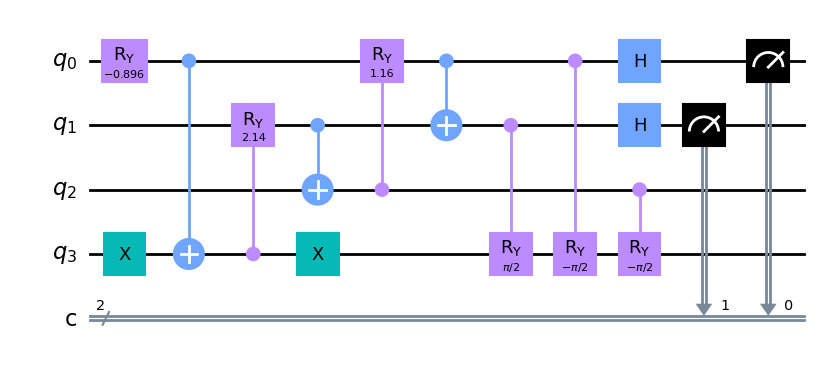

In [7]:
def build_circuit(i):
    q=QuantumCircuit(4,2)
    theta=paso*i*np.pi/180
    c1=np.sqrt(np.cos(theta)**2-0.75*p*np.cos(theta)**2+0.25*p*np.sin(theta)**2)
    c2=np.sqrt(0.25*p*np.cos(theta)**2+np.sin(theta)**2-0.75*p*np.sin(theta)**2)
    
    gamma=np.arcsin(0.5*np.sqrt(p)*np.sin(theta)/c1)
    beta=np.arcsin(-0.5*np.sqrt(p)*np.cos(theta)/c2)
    alfa=np.arcsin(c2/np.sqrt(1-0.5*p))
    a1=np.arcsin(-np.sqrt(p)/2)
    delta=np.arcsin(np.sqrt((1-0.5*p)/(1-0.25*p)))
    
    q.x(3)
    q.ry(2*a1,0)
    q.cx(0,3)
    q.cry(2*delta,3,1)
    q.cx(1,2)
    q.x(3)
    q.cry(2*alfa,2,0)
    q.cx(0,1)
    q.cry((gamma-beta),1,3)
    q.cry((-gamma+beta),0,3)
    q.cry((gamma+beta),2,3)
    q.h(0)
    q.h(1)
    
    q.measure([0,1],[0,1])
    return q

qc = build_circuit(0)
qc.draw("mpl")

In [70]:
for i in range(1,r,5):
    q=QuantumCircuit(4,2)
    theta=paso*i*np.pi/180
    c1=np.sqrt(np.cos(theta)**2-0.75*p*np.cos(theta)**2+0.25*p*np.sin(theta)**2)
    c2=np.sqrt(0.25*p*np.cos(theta)**2+np.sin(theta)**2-0.75*p*np.sin(theta)**2)
    
    gamma=np.arcsin(0.5*np.sqrt(p)*np.sin(theta)/c1)
    beta=np.arcsin(-0.5*np.sqrt(p)*np.cos(theta)/c2)
    alfa=np.arcsin(c2/np.sqrt(1-0.5*p))
    a1=np.arcsin(-np.sqrt(p)/2)
    delta=np.arcsin(np.sqrt((1-0.5*p)/(1-0.25*p)))
    
    q.x(3)
    q.ry(2*a1,0)
    q.cx(0,3)
    q.cry(2*delta,3,1)
    q.cx(1,2)
    q.x(3)
    q.cry(2*alfa,2,0)
    q.cx(0,1)
    q.cry((gamma-beta),1,3)
    q.cry((-gamma+beta),0,3)
    q.cry((gamma+beta),2,3)
    q.h(0)
    q.h(1)
    
    q.measure([0,1],[0,1])
    
    q2=transpile(q,backend,optimization_level=3)
    
    
    job=execute([q2 for j in range(c)],backend,shots=1000)
    counts=job.result().get_counts           
    temp1=[]
    temp2=[]
    temp3=[]
    temp4=[]
    for j in range(c):
        temp1.append(counts(j).get('00',0)/(1000))
        temp2.append(counts(j).get('01',0)/(1000))
        temp3.append(counts(j).get('10',0)/(1000))
        temp4.append(counts(j).get('11',0)/(1000))

    d1.append(np.std(temp1))
    d2.append(np.std(temp2))
    d3.append(np.std(temp3))
    d4.append(np.std(temp4))
    s1.append(sum(temp1)/c)#pxh
    s2.append(sum(temp2)/c)#pyh
    s3.append(sum(temp3)/c)#pxv
    s4.append(sum(temp4)/c)#pyv

    t.append(paso*np.pi*i/180)   
C_AB=([np.abs(e1-e2-e3+e4) for e1, e2, e3, e4 in zip(s1,s2,s3,s4)]) 
dC_AB=([np.sqrt(g1**2+g2**2+g3**2+g4**2) for g1, g2, g3, g4 in zip(d1,d2,d3,d4)])

In [71]:
df = pd.DataFrame()
df['theta']=t
df['C_AB'] = C_AB
df['dC_AB'] = dC_AB

print(df)

      theta    C_AB     dC_AB
0  0.069813  0.0250  0.017884
1  0.418879  0.1378  0.024969
2  0.767945  0.1984  0.031560
3  1.117011  0.1493  0.026249
4  1.466077  0.0463  0.025373


In [72]:
#df.to_csv("DPC_2_3_p09.txt", index=False)

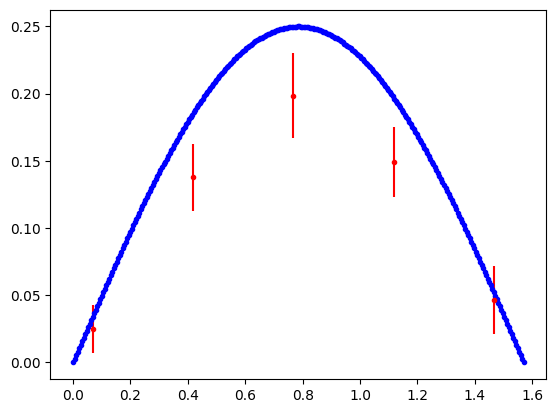

In [73]:
plt.errorbar(t, C_AB, dC_AB, fmt = 'r.')
th = np.linspace(0, pi/2, 300,endpoint=True)
C = (1-p)*np.abs(np.sin(2*th))

plt.plot(th,C,'b.')

In [ ]:
q.x(3)
q.ry(2*a1,0)
q.cx(0,3)
q.cry(2*delta,3,1)
q.cx(1,2)
q.x(3)
q.cry(2*alfa,2,0)
q.cx(0,1)
q.cry((gamma-beta),1,3)
q.cry((-gamma+beta),0,3)
q.cry((gamma+beta),2,3)
q.h(0)
q.h(1)    
q.h(1)
q.h(0)
q.cry((-gamma-beta),2,3)
q.cry((gamma-beta),0,3)
q.cry((-gamma+beta),1,3)
q.cx(0,1)
q.cry(-2*alfa,2,0)
q.x(3)
q.cx(1,2)
q.cry(-2*delta,3,1)
q.cx(0,3)
q.ry(-2*a1,0)
q.x(3)